#Finite Fractal
We construct the finite fractal of Chandra et al. [1].

[1]S. S. Chandra et al., “Chaotic Sensing,” Image Processing, IEEE Transactions on, vol. 27, no. 12, pp. 6079–6092, 2018, doi: 10.1109/TIP.2018.2864918.
https://doi.org/10.1109/TIP.2018.2864918

In [ ]:
import numpy as np
import math

In [ ]:
#parameters
p = 1031
t = 0

Let's construct the basic code for creating the [Farey sequence](https://en.wikipedia.org/wiki/Farey_sequence)

In [ ]:
#Farey sequence helper functions
def farey(p, q):
  '''
  Convenience member for creating a Farey vector from a Farey fraction p/q
  '''
  return complex( int(q), int(p) )

def nextFarey(n, vec1, vec2):
  '''
  Generate and return the next Farey vector
  See https://en.wikipedia.org/wiki/Farey_sequence#Next_term
  '''
  p1 = vec1.imag
  q1 = vec1.real
  p2 = vec2.imag
  q2 = vec2.real

  p3 = math.floor( (q1+n) / float(q2) )*p2 - p1
  q3 = math.floor( (q1+n) / float(q2) )*q2 - q1
  
  return farey(p3, q3)

def generate(n):
  '''
  Generate the Farey sequence up to n
  '''
  vectors = []
  nthVector = farey(1, n) # 1/n
  startVector = farey(0, 1)
  endVector = farey(1, 1)

  angle1 = startVector # 0/1
  angle2 = nthVector

  vectors.append(startVector)
  nextAngle = farey(0, 0)
  while nextAngle != endVector: # 1/1
      nextAngle = nextFarey(n, angle1, angle2)

      vectors.append(nextAngle)
      angle1 = angle2
      angle2 = nextAngle
      
  vectors.append(nthVector)

  return vectors

Let's define help functions for converting Farey vectors to slopes of periodic lines

In [ ]:
#Finite helper functions
def extended_gcd(a, b):
  '''
  Extended Euclidean algorithm
  Take positive integers a, b as input, and return a triple (x, y, d), such that ax + by = d = gcd(a, b).
  See https://en.wikipedia.org/wiki/Extended_Euclidean_algorithm
  ''' 
  x,y, u,v = 0,1, 1,0
  while a != 0:
    q, r = b//a, b%a
    m, n = x-u*q, y-v*q
    b,a, x,y, u,v = a,r, u,v, m,n
  return x, y, b

def minverse(x, m):
  '''
  Return multiplicative inverse from a tuple (u, v, d); they are the greatest common divisor d
  of two integers x and y and u, v such that d = x * u + y * v.
  When x and y are coprime, then xu is the modular multiplicative inverse of x modulo y.
  '''
  u, v, d = extended_gcd( int(x), int(m) )
    
  return (u+m)%m

def is_coprime(a, b):
  ''' Return True if numbers are coprime '''
  x, y ,d = extended_gcd(a, b)
  if d == 1:
    return True
  return False

def toFinite(fareyVector, N):
    '''
    Return the finite vector corresponding to the Farey vector provided for a given modulus/length N
    and the multiplicative inverse of the relevant Farey angle
    N is assumed to be prime, see https://doi.org/10.1109/LSP.2014.2313341
    '''
    p = fareyVector.imag
    q = fareyVector.real

    coprime = is_coprime(abs(q), N)
    
    qNeg = q #important, if q < 0, preserve for minverse.
    if q < 0:
        q += N #necessary for quadrants other than the first
    if p < 0:
        p += N #necessary for quadrants other than the first
#    print("p:", p, "q:", q, "N:", N)

    mValue = 0
    inv = 1
    if coprime:
        inv = minverse(qNeg, N)
        mValue = (p*inv)%N
#        print("vec:", fareyVector, "m:", mValue, "inv:", inv)
    else: #perp projection
        inv = minverse(p, N)
        mValue = int((q*inv)%N) + N 
#        print("perp vec:", fareyVector, "m:", mValue, "inv:", inv)

    return mValue, inv

Compute all the periodic lines whose slopes are shortest from the origin

In [ ]:
#compute lines with initial points closest to the origin
total_lines = p//2 #do half as many lines, arbitrary choice
angles = generate(p)
sortedVectors = sorted(angles, key=lambda x: x.real**2+x.imag**2) #sort by L2 magnitude
print(angles)
m_values_closest = []
count = 0
for angle in sortedVectors:
  m, inv = toFinite(angle, p)
  m_values_closest.append(m)

  count += 1
  if count > total_lines:
    break

  #symmetric angle
  a = angle.imag
  b = angle.real
  angle_sym = farey(b, a)
  m_sym, inv_sym = toFinite(angle_sym, p)
  m_values_closest.append(m_sym)

  count += 1
  if count > total_lines:
    break
print(m_values_closest)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



We can also use random slopes via the [randint function in Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

In [ ]:
#m_values = [2,5]
#m_values = np.arange(0, p)
#m_values = np.random.randint(0, p, size=p)
m_values = m_values_closest
print(m_values)

#compute coordinates
x_points = []
y_points = []
for m in m_values:
  for x in range(p):
    y = (m*x + t)%p 
    x_points.append(int(x))
    y_points.append(int(y))

#draw on image
image = np.zeros((p,p), dtype=np.uint8)
for x, y in zip(x_points, y_points):
  image[x, y] = 255

[0.0, 1031, 1.0, 1.0, 516.0, 2.0, 344.0, 3.0, 688.0, 517.0, 258.0, 4.0, 774.0, 345.0, 825.0, 5.0, 619.0, 518.0, 413.0, 689.0, 172.0, 6.0, 207.0, 259.0, 442.0, 7.0, 884.0, 519.0, 295.0, 346.0, 860.0, 826.0, 129.0, 8.0, 737.0, 775.0, 387.0, 690.0, 148.0, 620.0, 802.0, 9.0, 573.0, 520.0, 590.0, 173.0, 645.0, 414.0, 115.0, 260.0, 928.0, 10.0, 917.0, 208.0, 722.0, 347.0, 903.0, 443.0, 375.0, 11.0, 750.0, 521.0, 94.0, 691.0, 459.0, 885.0, 469.0, 776.0, 86.0, 12.0, 230.0, 130.0, 844.0, 827.0, 310.0, 296.0, 188.0, 861.0, 430.0, 621.0, 238.0, 13.0, 563.0, 738.0, 476.0, 522.0, 714.0, 348.0, 104.0, 803.0, 952.0, 261.0, 938.0, 388.0, 602.0, 149.0, 159.0, 415.0, 221.0, 14.0, 282.0, 574.0, 663.0, 692.0, 397.0, 174.0, 635.0, 591.0, 74.0, 209.0, 657.0, 929.0, 275.0, 15.0, 550.0, 523.0, 873.0, 646.0, 69.0, 777.0, 80.0, 116.0, 580.0, 16.0, 709.0, 349.0, 946.0, 376.0, 318.0, 723.0, 894.0, 444.0, 958.0, 918.0, 838.0, 828.0, 138.0, 904.0, 182.0, 17.0, 556.0, 751.0, 364.0, 524.0, 546.0, 693.0, 728.0, 262.0,

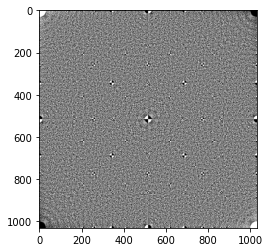

In [ ]:
#plot lines
import matplotlib.pyplot as plt

plt.figure(0)
plt.gray()
plt.imshow(image)

We could center the image, as currently we are assuming the origin is at the first image pixel. We can create a fractals out of any central tiling, we recently proved this, see https://arxiv.org/abs/2108.00639